In [1]:
from NeuroFlow import Sequential
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv('diabetes.csv')

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
dataY = data.pop("Outcome")
dataX = data


for cols in dataX:
    dataX[cols] = dataX[cols]/max(dataX[cols])


dataX

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,0.777778
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,0.333333
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,0.370370
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.144215,0.580247


In [4]:

trainLen = int(len(data['Age'])*0.8)

trainX = dataX[:trainLen] 
testX = dataX[trainLen:]

trainY = dataY[:trainLen] 
testY = dataY[trainLen:]

In [5]:
print(len(testX))
len(trainX)

154


614

In [6]:
trainX = np.array(trainX)
trainY = np.array(trainY)

trainX

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.25909091,
        0.61728395],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.14504132,
        0.38271605],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.27768595,
        0.39506173],
       ...,
       [0.17647059, 0.87437186, 0.47540984, ..., 0.49031297, 0.24504132,
        0.44444444],
       [0.41176471, 0.84422111, 0.72131148, ..., 0.56929955, 0.32520661,
        0.49382716],
       [0.35294118, 0.52763819, 0.6557377 , ..., 0.48435171, 0.36280992,
        0.32098765]])

In [7]:
trainY = np.array(trainY)
testY = np.array(testY)

trainY = trainY.reshape(trainY.shape[0],1)
testY = testY.reshape(testY.shape[0],1)




In [8]:
trainX.shape

(614, 8)

In [16]:
model = Sequential(8,1)

model.addLayer(16,activation='relu')
model.addLayer(8,activation='relu')
model.addLayer(4,activation='relu')


In [17]:
loss = model.fit(trainX,trainY,epochs=1000000,learningRate=0.04,verboseInterval=50000)


Epoch: 0
|====================|   Loss: 0.70378834877554

Epoch: 50000
|====================|   Loss: 0.26476550883754885

Epoch: 100000
|====================|   Loss: 0.1564111330172029

Epoch: 150000
|====================|   Loss: 0.1338269963786066

Epoch: 200000
|====================|   Loss: 0.5034677534423899

Epoch: 250000
|====================|   Loss: 0.12472382567731585

Epoch: 300000
|====================|   Loss: 0.12349190691265144

Epoch: 350000
|====================|   Loss: 0.12547914984170963

Epoch: 400000
|====================|   Loss: 0.11777705697015547

Epoch: 450000
|====================|   Loss: 0.11530268402713321

Epoch: 500000
|====================|   Loss: 0.11363665369859734

Epoch: 550000
|====================|   Loss: 0.11396790593398115

Epoch: 600000
|====================|   Loss: 0.11450079043091145

Epoch: 650000
|====================|   Loss: 0.11687241376866543

Epoch: 700000
|====================|   Loss: 0.11849032049374736

Epoch: 750000
|======

<function matplotlib.pyplot.show(close=None, block=None)>

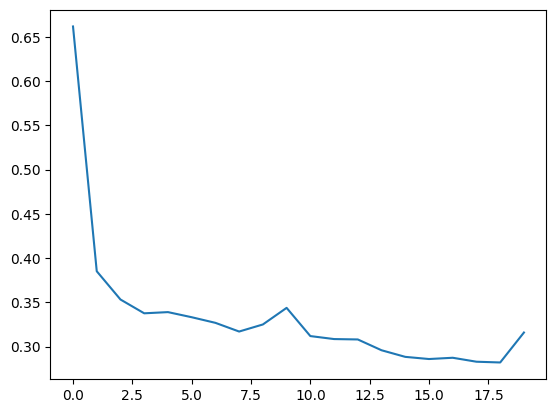

In [13]:
plt.plot(loss)
plt.show

In [19]:
correct = 0
total = testY.shape[0]

pred = model.predict(testX)


prediction = []
for i in pred:
    if i >=0.5:
        prediction.append(1)
    else:
        prediction.append(0)


for i in range(total):
    if testY[i][0] == prediction[i]:
        correct +=1


print("Accuracy:",correct/total)




Accuracy: 0.6948051948051948
